In [68]:
import numpy as np 
import pandas as pd 
from pathlib import Path
%matplotlib inline

In [69]:
yen_futures = pd.read_csv(
    Path("Resources/yen.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
yen_futures.index = pd.DatetimeIndex(yen_futures.index).to_period('D')
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2.0,1.0
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0.0,1.0


In [70]:
yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336.0,51473.0
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206.0,53860.0
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649.0,55699.0
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944.0,53111.0
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763.0,52072.0


In [71]:
yen_futures_df = pd.DataFrame(yen_futures["Settle"])
yen_futures_df
# type(yen_futures_settle_df)

,Settle
Date,
1990-01-02,6847.0
1990-01-03,6887.0
1990-01-04,7008.0
1990-01-05,6950.0
1990-01-08,6959.0
...,...
2019-10-09,9338.0
2019-10-10,9303.5
2019-10-11,9251.0


<AxesSubplot:xlabel='Date'>

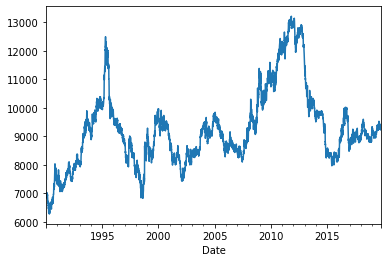

In [72]:
yen_futures.Settle.plot()

In [73]:
import statsmodels.api as sm 
yen_futures_noise, yen_futures_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])

<AxesSubplot:xlabel='Date'>

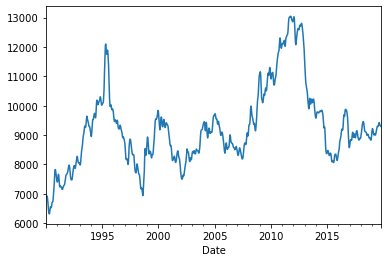

In [74]:
yen_futures_trend.plot()

<AxesSubplot:xlabel='Date'>

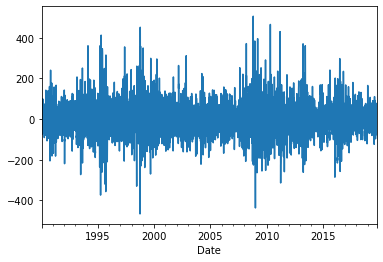

In [75]:
yen_futures_noise.plot()

In [76]:
yen_futures_noise_df = pd.DataFrame(yen_futures_noise)
yen_futures_noise_df.rename(columns = {'Settle_cycle':'Noise'}, inplace=True)
yen_futures_noise_df

,Noise
Date,
1990-01-02,-61.503967
1990-01-03,-21.799756
1990-01-04,98.942896
1990-01-05,40.776052
1990-01-08,49.689938
...,...
2019-10-09,24.939247
2019-10-10,-5.868559
2019-10-11,-54.454594


In [77]:
yen_futures_trend_df = pd.DataFrame(yen_futures_trend)
yen_futures_trend_df.rename(columns = {'Settle_trend':'Trend'}, inplace=True)
yen_futures_trend_df

,Trend
Date,
1990-01-02,6908.503967
1990-01-03,6908.799756
1990-01-04,6909.057104
1990-01-05,6909.223948
1990-01-08,6909.310062
...,...
2019-10-09,9313.060753
2019-10-10,9309.368559
2019-10-11,9305.454594


In [78]:
yen_df = pd.concat([yen_futures_df, yen_futures_trend_df, yen_futures_noise_df], axis="columns", join="inner")
yen_df

,Settle,Trend,Noise
Date,,,
1990-01-02,6847.0,6908.503967,-61.503967
1990-01-03,6887.0,6908.799756,-21.799756
1990-01-04,7008.0,6909.057104,98.942896
1990-01-05,6950.0,6909.223948,40.776052
1990-01-08,6959.0,6909.310062,49.689938
...,...,...,...
2019-10-09,9338.0,9313.060753,24.939247
2019-10-10,9303.5,9309.368559,-5.868559
2019-10-11,9251.0,9305.454594,-54.454594


<AxesSubplot:title={'center':'Yen Settle vs. Trend'}, xlabel='Date'>

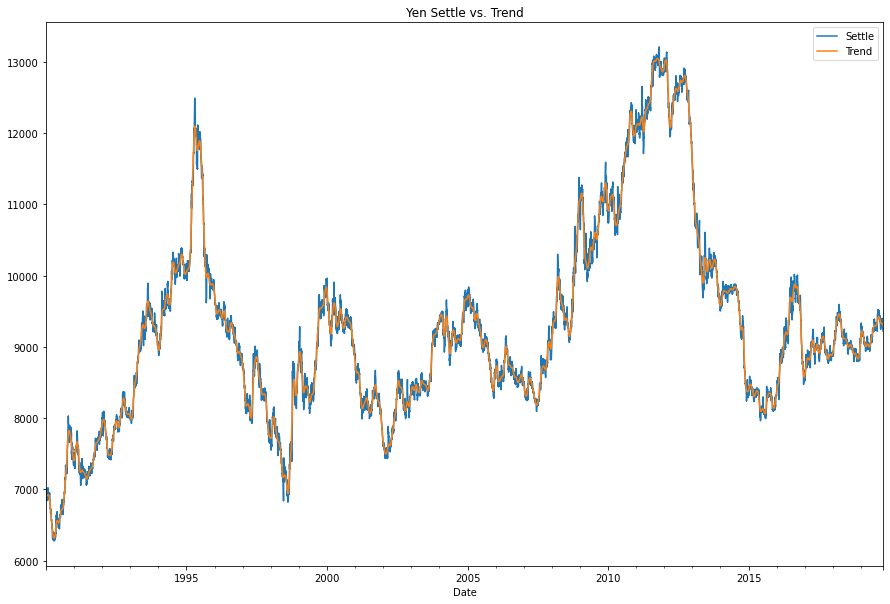

In [79]:
yen_df.drop(["Noise"], inplace=True, axis=1)
yen_df.plot(figsize=(15,10), title="Yen Settle vs. Trend")

In [80]:
yen_2015_pres = yen_df.loc["2015":]

<AxesSubplot:title={'center':'Yen 2015-Present Settle vs. Trend'}, xlabel='Date'>

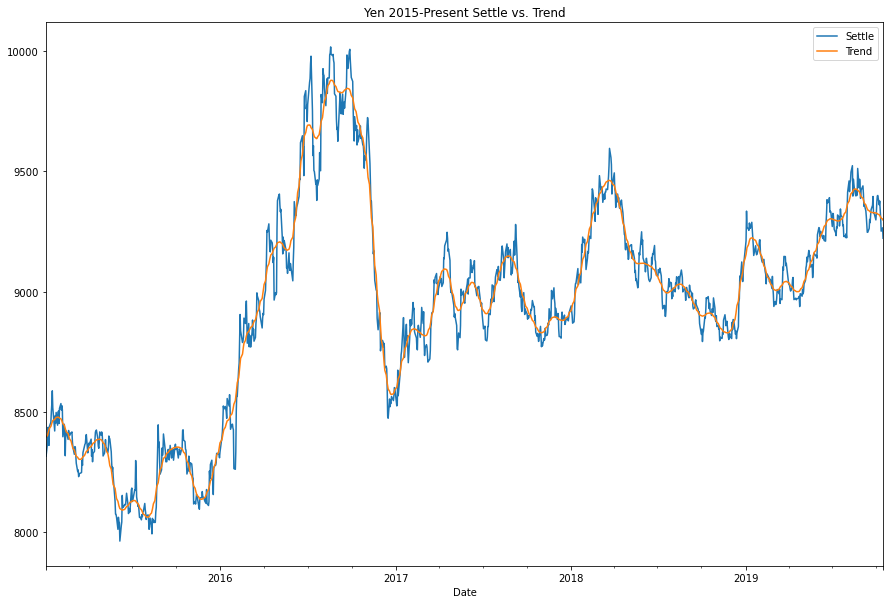

In [81]:
yen_2015_pres.plot(figsize=(15,10), title="Yen 2015-Present Settle vs. Trend")

# Forecasting Returns using an ARMA Model

Using futures Settle *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [82]:
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [83]:
from statsmodels.tsa.arima_model import ARMA  
model = ARMA(returns.values, order=(2, 1))
results = model.fit()

In [84]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Fri, 20 Nov 2020   AIC                          15798.142
Time:                        13:32:23   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.421      -0.009       0.022
ar.L1.y       -0.3060      1.278     -0.240      0.811      -2.810       2.198
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2945      1.278      0.230      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3371           +0.0000j            3.3371            0.5000
AR.2         -157.2793           +0.0000j          157.2793            0.5000
MA.1           -3.3961           +0.0000j            3.3961            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yen ARMA 5-Day Forecast'}>

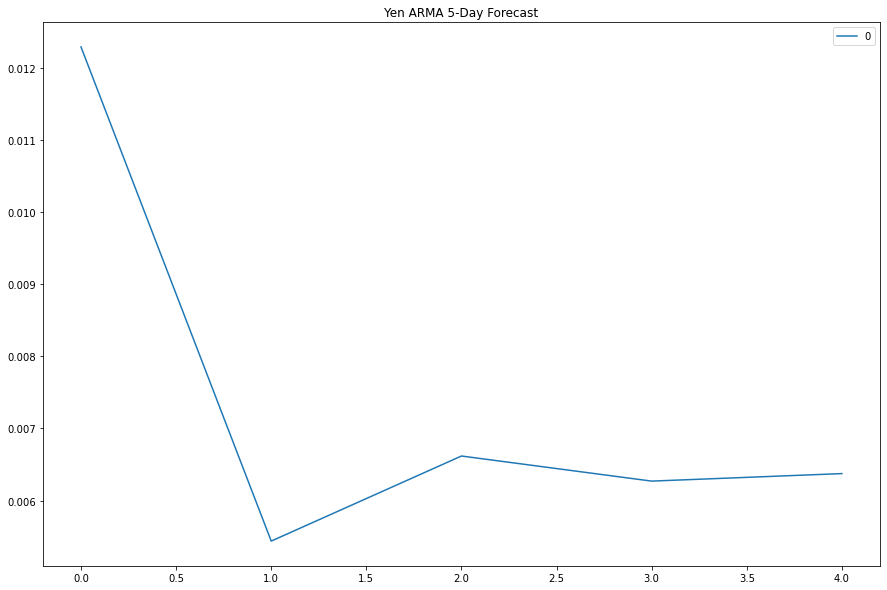

In [85]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(figsize=(15,10),title="Yen ARMA 5-Day Forecast")

# Forecasting the Settle Price using an ARIMA Model

 1. Using the *raw* Yen **Settle Price**, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Construct a 5 day forecast for the Settle Price. What does the model forecast will happen to the Japanese Yen in the near term?

In [86]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(yen_futures["Settle"], order=(5,1,1))
results = model.fit()

In [87]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Settle   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Fri, 20 Nov 2020   AIC                          83905.238
Time:                        13:32:24   BIC                          83960.635
Sample:                    01-03-1990   HQIC                         83924.259
                         - 10-15-2019                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3160      0.700      0.452      0.652      -1.056       1.688
ar.L1.D.Settle     0.2819      0.699      0.403      0.687      -1.089       1.653
ar.L2.D.Settle     0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.Settle    -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.Settle    -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.Settle    -0.0012      0.018     -0.065      0.949      -0.036       0.034
ma.L1.D.Settle    -0.2970      0.699     -0.425      0.671      -1.668       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8916           -1.3789j            2.3408           -0.1003
AR.2            1.8916           +1.3789j            2.3408            0.1003
AR.3           -2.2687           -3.0217j            3.7786           -0.3525
AR.4           -2.2687           +3.0217j            3.7786            0.3525
AR.5          -11.0258           -0.0000j           11.0258           -0.5000
MA.1            3.3673           +0.0000j            3.3673            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Yen ARIMA 5-Day Forecast'}>

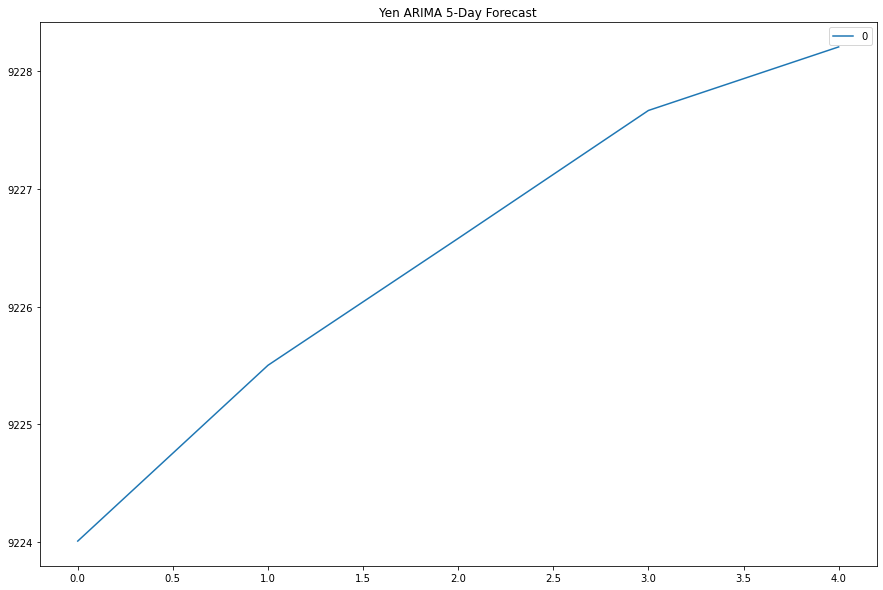

In [88]:
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="Yen ARIMA 5-Day Forecast", figsize=(15,10))

# Please see the notebook md_time_series_analysis _part2.ipynb for the GARCH portion of the homework.